In [1]:
import os
import pandas as pd
import numpy as np
import csv

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn import metrics

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read AML dependent data for training
dependent_data_2761_subjects = pd.read_csv("Dependent_Data_All_Factors_Corrected_Data_2761_Subjects_2213_AML_548_Healthy_974_AML_probsets_Predictors.csv", index_col = [0]).transpose() 

In [3]:
dependent_data_2761_subjects.shape

(2761, 974)

In [4]:
dependent_data_2761_subjects.head()

,200602_at,200722_s_at,200782_at,200832_s_at,200946_x_at,200974_at,200983_x_at,200986_at,200998_s_at,201015_s_at,...,242888_at,243001_at,243092_at,243384_at,243706_at,243797_at,244030_at,244043_at,244297_at,37079_at
GSM259087,1.297539,1.392409,1.027064,0.111663,1.483360,1.449332,1.092168,1.051632,0.393156,1.148478,...,-0.774488,-0.867879,0.619717,-1.187252,-0.776018,0.641581,-0.134870,0.194044,-0.456224,-0.112474
GSM259088,-1.378910,1.424218,1.192688,-0.189030,1.472979,1.296810,1.998511,1.453404,0.880878,0.738508,...,-0.190250,-0.945929,0.177261,-1.125785,-0.778146,0.900601,-0.751019,0.858652,-0.025243,-0.723126
GSM259089,0.924651,1.382827,1.511259,0.958691,1.452452,0.534820,1.406378,1.009450,0.736137,1.239491,...,-0.643756,-0.933845,-0.091583,-0.888849,-0.574294,0.733291,-0.525242,0.158801,-0.148560,-0.301435
GSM259090,0.824415,1.282069,0.015030,0.145804,1.317093,1.005495,0.498802,-0.004537,0.091547,1.226556,...,-0.718261,-0.659499,0.952519,-1.081747,-0.640571,0.786002,-0.572304,-0.349141,-0.511744,-0.274177
GSM259091,0.934866,1.396415,1.014507,-0.076499,1.460708,1.163035,1.480175,0.979271,0.597280,0.986748,...,-0.667744,-0.738587,0.203649,-1.144351,-0.605030,0.863905,-0.462335,-0.139304,-0.245095,-0.614119


In [5]:
# read AML target data for training
# aml=1 and healthy=0
target_data_2761_subjects = pd.read_csv("Target_Data_All_Factors_Corrected_Data_2761_Subjects_2213_AML_548_Healthy_974_AML_probsets_Predictors.csv", index_col = [0])

In [6]:
target_data_2761_subjects.shape

(2761, 1)

In [10]:
target_data_2761_subjects.head()

,target
ID_REF,
GSM259087,0
GSM259088,0
GSM259089,0
GSM259090,0
GSM259091,0


In [12]:
y = target_data_2761_subjects["target"].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# set algorthm parameters -- all points in each neighborhood are weighted equally ("uniform")
knn_classifier = KNeighborsClassifier(n_neighbors = 30, weights = "uniform", algorithm = "auto", 
                                      leaf_size = 30, p = 4, metric = "minkowski", 
                                      metric_params = None, n_jobs = 1)

In [15]:
scores = cross_val_score (knn_classifier, dependent_data_2761_subjects, y, 
                          cv = 10, scoring="accuracy")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2))

Accuracy: 97.93 (+/- 0.03)


In [39]:
# test different power parameter for the Minkowski metric
n_neighbors = range(1, 50,5)
k_scores = []
k_st = []
for k in n_neighbors:

    knn_classifier = KNeighborsClassifier(n_neighbors = k, weights = "uniform", algorithm = "auto",
                                          leaf_size = 1, p = 1, metric = "minkowski", 
                                          metric_params = None, n_jobs = 1)
    scores = cross_val_score (knn_classifier, dependent_data_2761_subjects, y, cv = 10, 
                              scoring="accuracy")
    scores_percent = scores.mean()*100
    k_scores.append(scores_percent), k_st.append(scores.std())
    print("k:", k, "; Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() * 100, scores.std() * 2))

k: 1 ; Accuracy: 99.60 (+/- 0.02)
k: 6 ; Accuracy: 99.71 (+/- 0.01)
k: 11 ; Accuracy: 99.67 (+/- 0.01)
k: 16 ; Accuracy: 99.67 (+/- 0.01)
k: 21 ; Accuracy: 99.53 (+/- 0.01)
k: 26 ; Accuracy: 99.53 (+/- 0.01)
k: 31 ; Accuracy: 99.42 (+/- 0.02)
k: 36 ; Accuracy: 99.46 (+/- 0.02)
k: 41 ; Accuracy: 99.38 (+/- 0.02)
k: 46 ; Accuracy: 99.35 (+/- 0.02)


In [40]:
print("means: ",k_scores)
print("std:",k_st)

means:  [99.60144927536231, 99.71014492753622, 99.67391304347825, 99.67391304347825, 99.52898550724638, 99.52898550724638, 99.42028985507247, 99.45652173913044, 99.3840579710145, 99.34782608695653]
std: [0.008489401821637672, 0.00644072059225767, 0.0063689839968286, 0.0063689839968286, 0.007255429128442314, 0.007255429128442314, 0.0078045866770065225, 0.007812992265524569, 0.008270081311966174, 0.008845330156328768]


In [62]:
type(range(1,11))

range

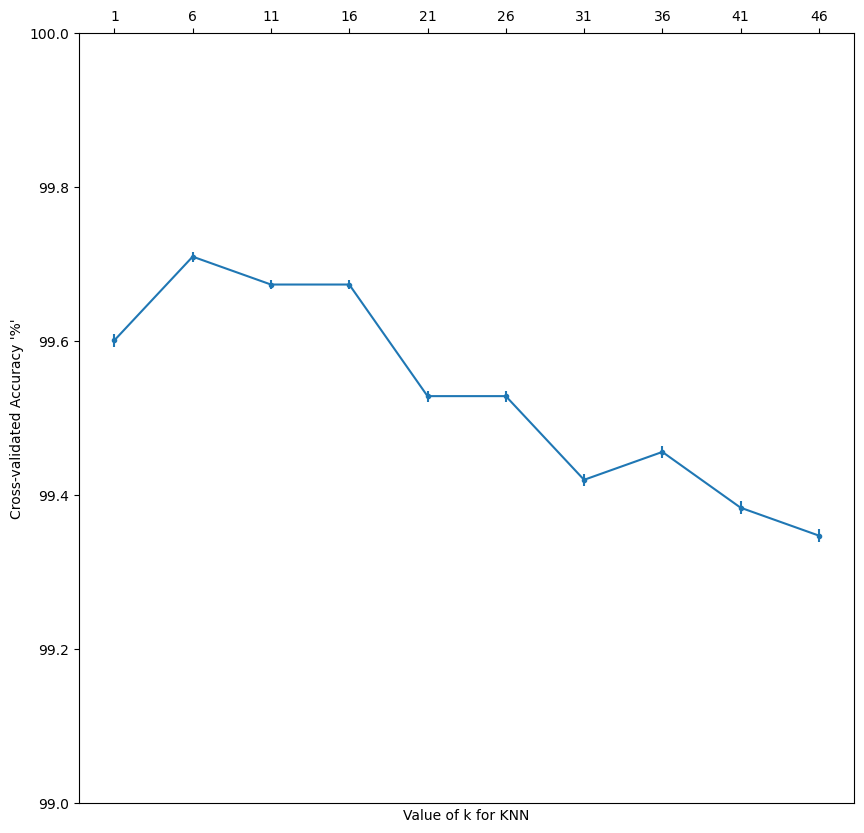

In [69]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 10  
fig_size[1] = 10

ax = plt.axes()

plt.errorbar(range(1, 50,5), k_scores, k_st, marker='.')
plt.ylim(99, 100)

plt.xlabel("Value of k for KNN")
plt.ylabel("Cross-validated Accuracy '%'")
ax.set_xticks(range(1, 50,5))

title = "AML_DiseaseSate_KNN-Classification_Trained_on_974_ProbSets_from_2761_Subjects-knn_number.png"

plt.savefig(title,bbox_inches='tight')
plt.show() 

In [49]:
predict = cross_val_predict (knn_classifier, dependent_data_2761_subjects, y, cv = 10)


In [51]:
predict

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
# AUC (Area under the ROC Curve) ranges from 0 (worst) to 1 (best)
auc_score = metrics.roc_auc_score(y, predict)
"AUC Score: %0.2f%%" % (auc_score * 100)

'AUC Score: 99.59%'

In [50]:
accuracy_score = metrics.accuracy_score(y, predict) 
"Accuracy Score: %0.2f%%" % (accuracy_score * 100)

'Accuracy Score: 99.35%'

In [51]:
confusion_matrix_result = confusion_matrix(y,predict)
confusion_matrix_result

array([[2195,   18],
       [   0,  548]])

In [55]:
TP = confusion_matrix_result[1, 1]
TN = confusion_matrix_result[0, 0]
FP = confusion_matrix_result[0, 1]
FN = confusion_matrix_result[1, 0]

error = round((FP+FN)/(TP+TN+FP+FN)*100,2)
specificity = round(TN/(TN+FP)*100,2)
sensitivity = round(TP/(TP+FN)*100,2)
precision = round(TP/(TP+FP)*100,2)

In [57]:


fields=['Accuracy','Error',"Specificity","Sensitivity","Precision","AUC Score"]
with open(r'AML_DiseaseSate_KNN-Classification_Trained_on_974_ProbSets_from_2761_Subjects-Accuracy.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(fields)

confusion_matrix_result_List = ["Avg. Accuracy (%%): %0.2f (+/- %0.2f)" % (scores.mean() * 100,
                                scores.std() * 2),
                                error, 
                                specificity,
                                sensitivity,
                                precision,
                               "AUC Score (%%): %0.2f" % (auc_score * 100)]
with open(r'AML_DiseaseSate_KNN-Classification_Trained_on_974_ProbSets_from_2761_Subjects-Accuracy.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(confusion_matrix_result_List)

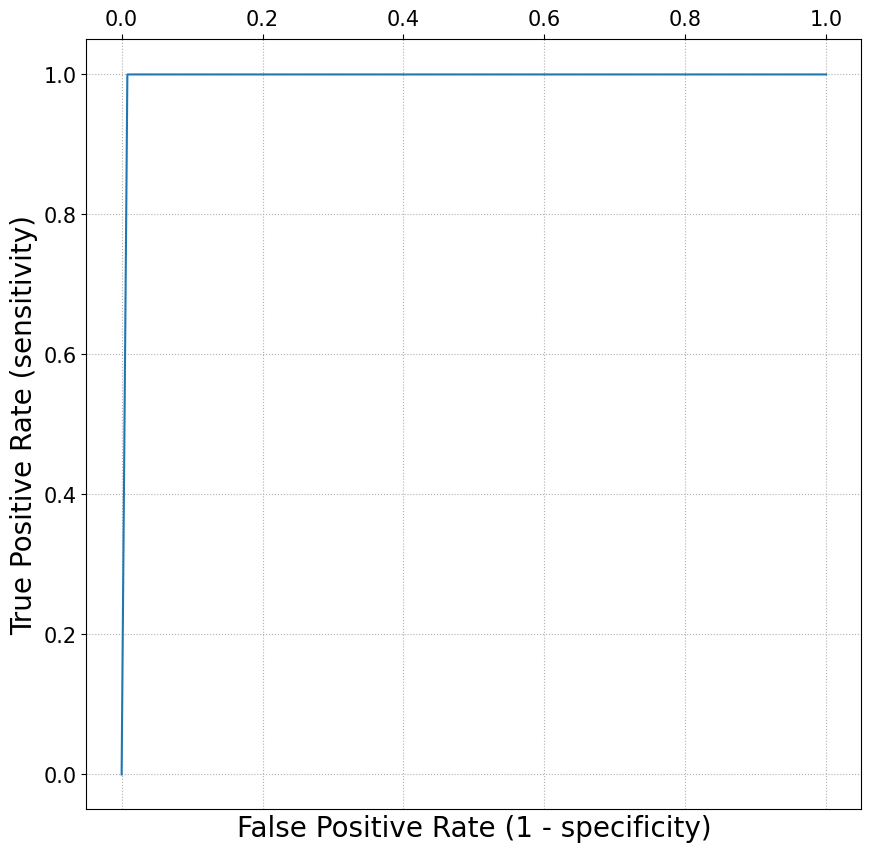

In [60]:
fig_size = plt.rcParams["figure.figsize"] 
fig_size[0] = 10  
fig_size[1] = 10




fpr, tpr, thresholds = metrics.roc_curve(y, predict)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (1 - specificity)',fontsize=20)
plt.ylabel('True Positive Rate (sensitivity)',fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# plt.title('ROC curve for AML KNN-classifier')
plt.grid(linestyle='dotted')


title = "AML_DiseaseSate_KNN-Classification_Trained_on_974_ProbSets_from_2761_Subjects-ROC_Curve.png"

plt.savefig(title,bbox_inches='tight')
plt.show() 
